In [446]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Projet Generali Challenge

Lecture du fichier

In [447]:
data = pd.read_csv('X.csv', delimiter=',')
target_data = pd.read_csv('y.csv', delimiter=',')

data.head()

,Unnamed: 0,Identifiant,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,...,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee
0,0,18702,2014,1,0,V,N,1,O,1,...,IDENTIQUE,V,base,2,1351.0,4,2012.0,0.0,2,65440
1,1,3877,2014,1,0,V,V,V,V,V,...,V,N,base,2,1972.0,2,1980.0,0.0,.,14341
2,2,4942,2013,1,1,V,V,V,V,V,...,V,N,base,2,1630.0,4,NaN,0.0,.,75109
3,3,13428,2013,"0,246575342",0,N,V,V,V,V,...,V,N,base,2,532.0,3,NaN,0.0,.,92004
4,4,17137,2015,1,0,V,N,2,O,1,...,IDENTIQUE,V,base,2,1050.0,2,1972.0,0.0,4,59340


Après vérification de l'unicité des identifiants des deux fichiers, nous avons merge le fichier X.csv avec le fichier y.csv, avec rajout de la colonne target sur l'identifiant (commun aux deux fichiers).

In [448]:
print("data, Nombre d'identifiants uniques:", data['Identifiant'].nunique())
print("target_data, Nombre d'identifiants uniques:", target_data['Identifiant'].nunique())

data = data.merge(target_data[['Identifiant', 'target']], on='Identifiant')
data.head()

data, Nombre d'identifiants uniques: 10229
target_data, Nombre d'identifiants uniques: 10229


,Unnamed: 0,Identifiant,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,target
0,0,18702,2014,1,0,V,N,1,O,1,...,V,base,2,1351.0,4,2012.0,0.0,2,65440,0
1,1,3877,2014,1,0,V,V,V,V,V,...,N,base,2,1972.0,2,1980.0,0.0,.,14341,1
2,2,4942,2013,1,1,V,V,V,V,V,...,N,base,2,1630.0,4,NaN,0.0,.,75109,0
3,3,13428,2013,"0,246575342",0,N,V,V,V,V,...,N,base,2,532.0,3,NaN,0.0,.,92004,0
4,4,17137,2015,1,0,V,N,2,O,1,...,V,base,2,1050.0,2,1972.0,0.0,4,59340,0


Nous allons pouvoir retirer la colonne "unnamed" qui est le numéro de ligne, une colonne non pertinante.

In [449]:
df = data.copy()
df = df.drop(['Unnamed: 0'], axis=1)

df.head()

,Identifiant,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,target
0,18702,2014,1,0,V,N,1,O,1,O,...,V,base,2,1351.0,4,2012.0,0.0,2,65440,0
1,3877,2014,1,0,V,V,V,V,V,V,...,N,base,2,1972.0,2,1980.0,0.0,.,14341,1
2,4942,2013,1,1,V,V,V,V,V,V,...,N,base,2,1630.0,4,NaN,0.0,.,75109,0
3,13428,2013,"0,246575342",0,N,V,V,V,V,V,...,N,base,2,532.0,3,NaN,0.0,.,92004,0
4,17137,2015,1,0,V,N,2,O,1,O,...,V,base,2,1050.0,2,1972.0,0.0,4,59340,0


## Dimensions du dataset

In [450]:
df.shape

(10229, 26)

Nous avons 10229 lignes, une colonne binaire à prédire et 25 variables explicatives.

## Types et valeurs manquantes par variable

In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10229 entries, 0 to 10228
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Identifiant  10229 non-null  int64  
 1   ft_2_categ   10229 non-null  int64  
 2   EXPO         10229 non-null  object 
 3   ft_4_categ   10229 non-null  int64  
 4   ft_5_categ   10229 non-null  object 
 5   ft_6_categ   10229 non-null  object 
 6   ft_7_categ   10229 non-null  object 
 7   ft_8_categ   10229 non-null  object 
 8   ft_9_categ   10229 non-null  object 
 9   ft_10_categ  10229 non-null  object 
 10  ft_11_categ  10229 non-null  object 
 11  ft_12_categ  10229 non-null  object 
 12  ft_13_categ  10229 non-null  object 
 13  ft_14_categ  10229 non-null  object 
 14  ft_15_categ  10229 non-null  object 
 15  ft_16_categ  10229 non-null  object 
 16  ft_17_categ  10229 non-null  object 
 17  ft_18_categ  10229 non-null  object 
 18  ft_19_categ  10229 non-null  int64  
 19  supe

target est la variable cible, étant un booléen, nous allons la passer en object plutôt qu'en int.

In [452]:
df['target'] = df['target'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10229 entries, 0 to 10228
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Identifiant  10229 non-null  int64  
 1   ft_2_categ   10229 non-null  int64  
 2   EXPO         10229 non-null  object 
 3   ft_4_categ   10229 non-null  int64  
 4   ft_5_categ   10229 non-null  object 
 5   ft_6_categ   10229 non-null  object 
 6   ft_7_categ   10229 non-null  object 
 7   ft_8_categ   10229 non-null  object 
 8   ft_9_categ   10229 non-null  object 
 9   ft_10_categ  10229 non-null  object 
 10  ft_11_categ  10229 non-null  object 
 11  ft_12_categ  10229 non-null  object 
 12  ft_13_categ  10229 non-null  object 
 13  ft_14_categ  10229 non-null  object 
 14  ft_15_categ  10229 non-null  object 
 15  ft_16_categ  10229 non-null  object 
 16  ft_17_categ  10229 non-null  object 
 17  ft_18_categ  10229 non-null  object 
 18  ft_19_categ  10229 non-null  int64  
 19  supe

Nous avons 

In [453]:
df.isnull().sum()

Identifiant       0
ft_2_categ        0
EXPO              0
ft_4_categ        0
ft_5_categ        0
ft_6_categ        0
ft_7_categ        0
ft_8_categ        0
ft_9_categ        0
ft_10_categ       0
ft_11_categ       0
ft_12_categ       0
ft_13_categ       0
ft_14_categ       0
ft_15_categ       0
ft_16_categ       0
ft_17_categ       0
ft_18_categ       0
ft_19_categ       0
superficief     119
ft_21_categ       0
ft_22_categ    1236
ft_23_categ       0
ft_24_categ       0
Insee           115
target            0
dtype: int64

Observations : Nous avons 119 valeurs nulles dans la colonne superficief, 1236 dans la colonne ft_22_categ ainsi que 115 dans Insee.

On pourrait remplacer les valeurs manquantes par une imputation avancée (entraîner le modèle pour prédire les données manquantes)

In [454]:
df[df['superficief'].isna()]

,Identifiant,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,target
15,14454,2013,1,1,V,V,V,V,V,V,...,V,V,2,NaN,2,2011.0,V,.,NaN,0
33,17151,2012,1,0,V,V,V,V,V,V,...,V,V,2,NaN,2,1920.0,V,.,NaN,0
37,11721,2012,1,0,V,V,V,V,V,V,...,V,V,2,NaN,2,1993.0,V,.,NaN,0
45,15994,2012,1,1,V,V,V,V,V,V,...,V,V,2,NaN,4,1987.0,V,.,NaN,0
136,5078,2013,1,1,V,V,V,V,V,V,...,V,V,2,NaN,2,1950.0,V,.,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9711,15067,2012,1,0,V,V,V,V,V,V,...,V,V,2,NaN,3,1960.0,V,.,NaN,0
9729,17650,2012,1,1,V,V,V,V,V,V,...,V,V,2,NaN,3,1960.0,V,.,NaN,0
10007,17249,2012,1,0,V,V,V,V,V,V,...,V,V,2,NaN,2,1960.0,V,.,NaN,0
10071,48,2014,"0,030136986",0,V,V,V,V,V,V,...,V,V,2,NaN,1,1970.0,V,.,NaN,0


## Distribution variable cible

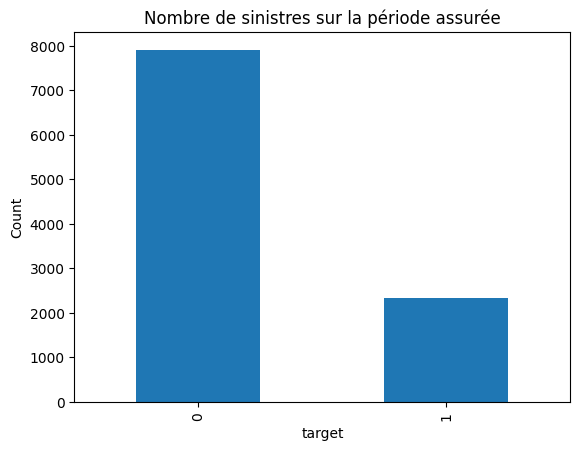

In [455]:
df['target'].value_counts().plot(kind='bar')
plt.xlabel('target')
plt.ylabel('Count')
plt.title('Nombre de sinistres sur la période assurée')
plt.show()

## Analyse univariée des variables qualitatives

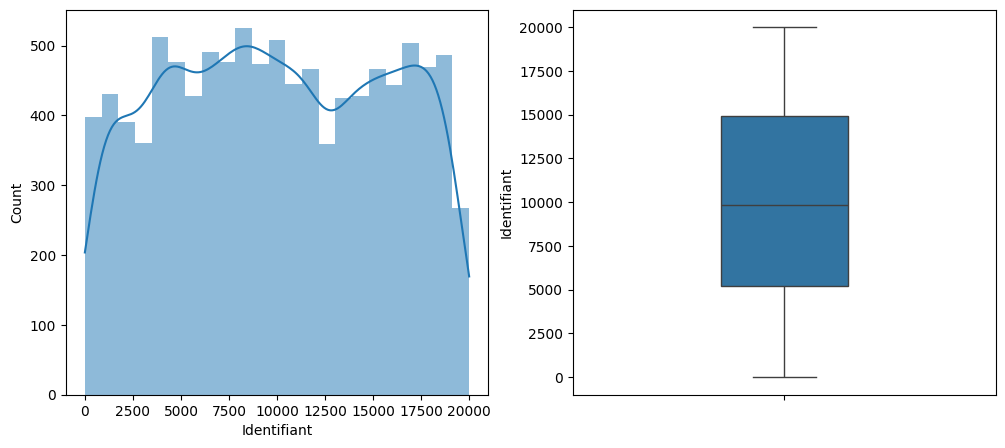

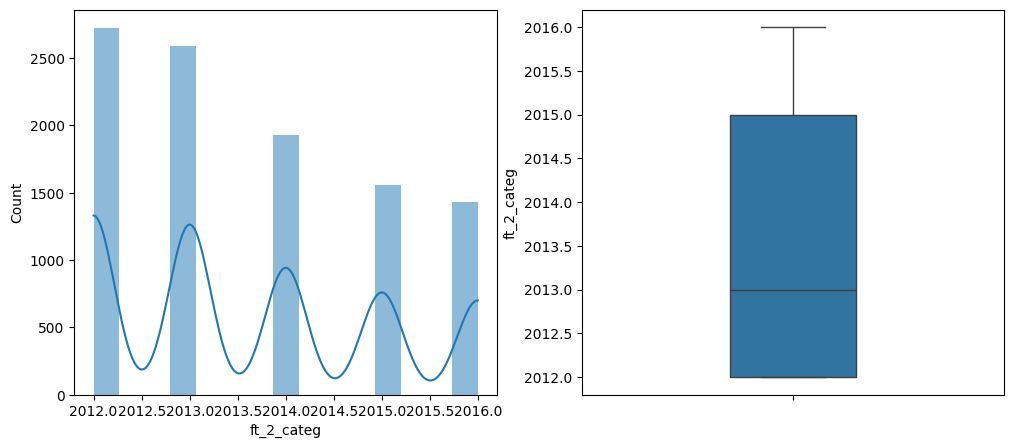

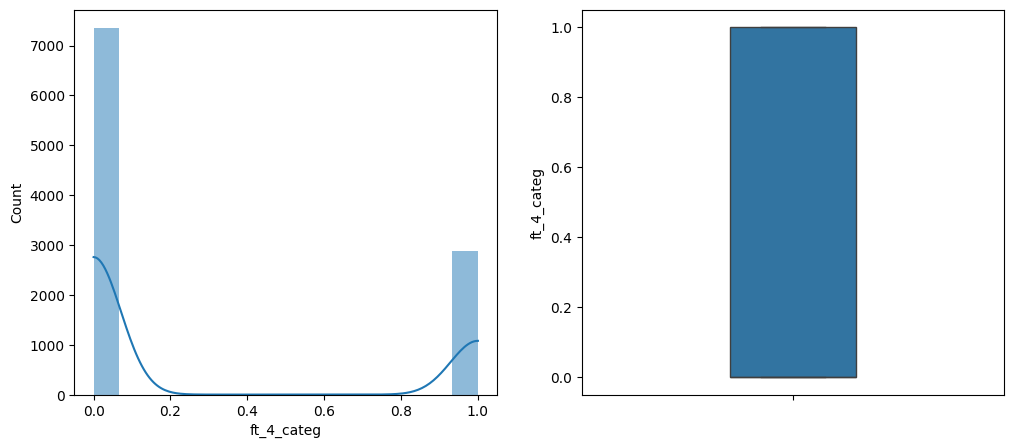

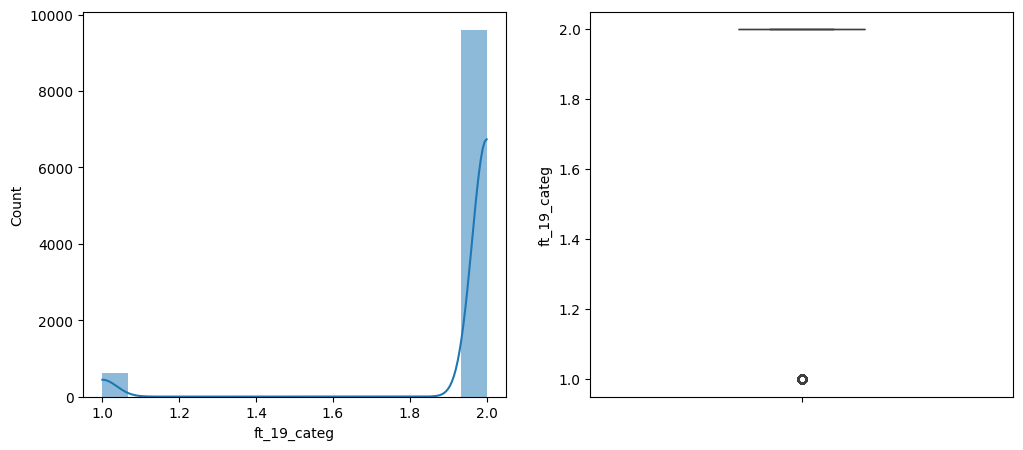

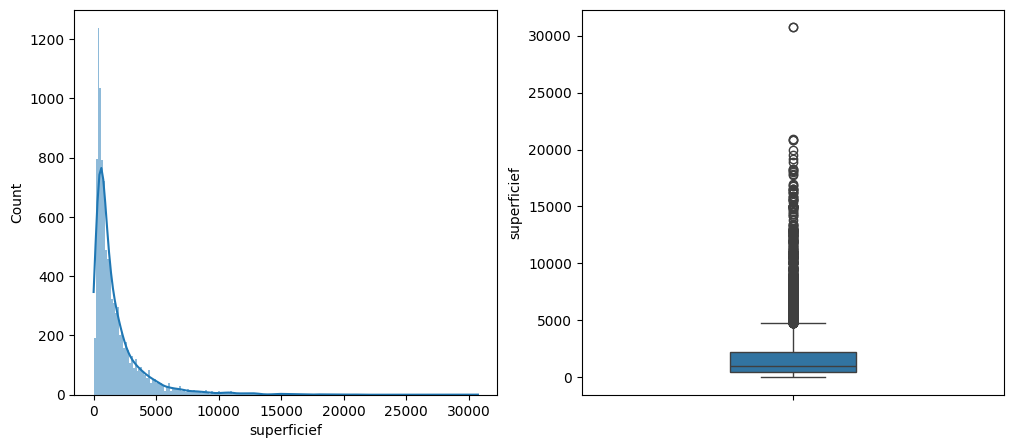

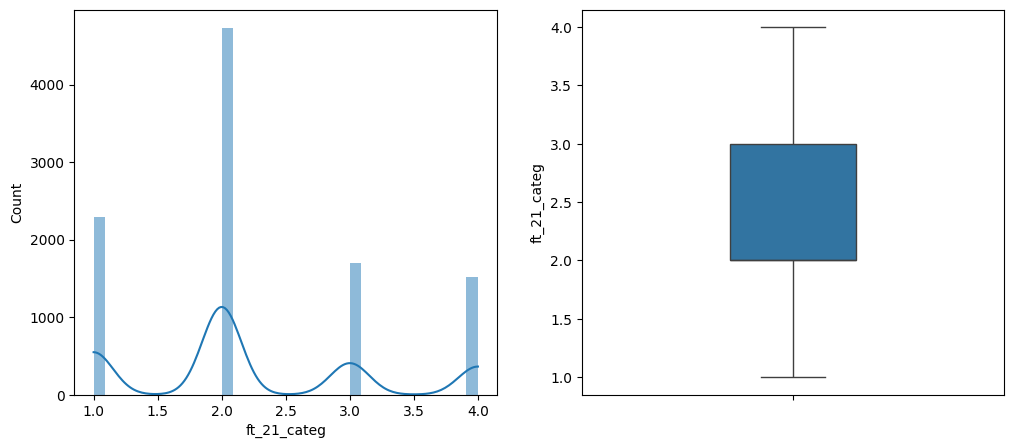

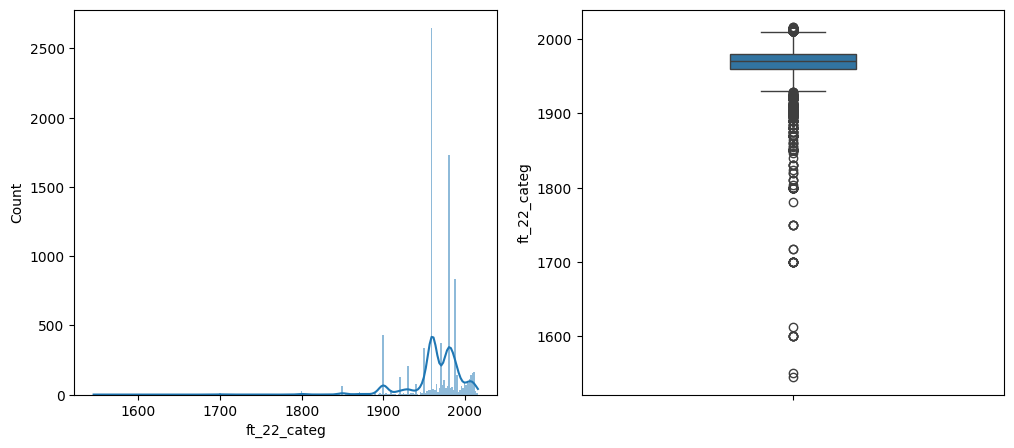

In [456]:
import seaborn as sns

for col in df.select_dtypes(['float64', 'int64']):
    plt.figure(figsize=(12,5))
    
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, edgecolor=None)

    plt.subplot(1,2,2)
    sns.boxplot(df[col], width=0.3)

Nous allons retirer ces colonnes car elles ne sont pas des variables quantitatives, chacune d'elle prend des valeurs précises (0/1, 1/2, 1/2/3/4). Ce sont des catégories et non des quantités mesurables.

In [457]:
df['ft_2_categ'] = df['ft_2_categ'].astype(object)
df['ft_4_categ'] = df['ft_4_categ'].astype(object)
df['ft_19_categ'] = df['ft_19_categ'].astype(object)
df['ft_21_categ'] = df['ft_21_categ'].astype(object)

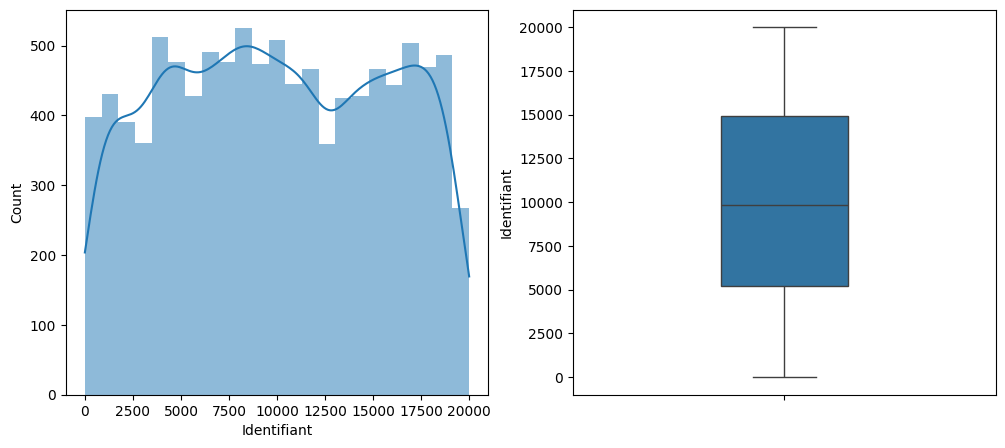

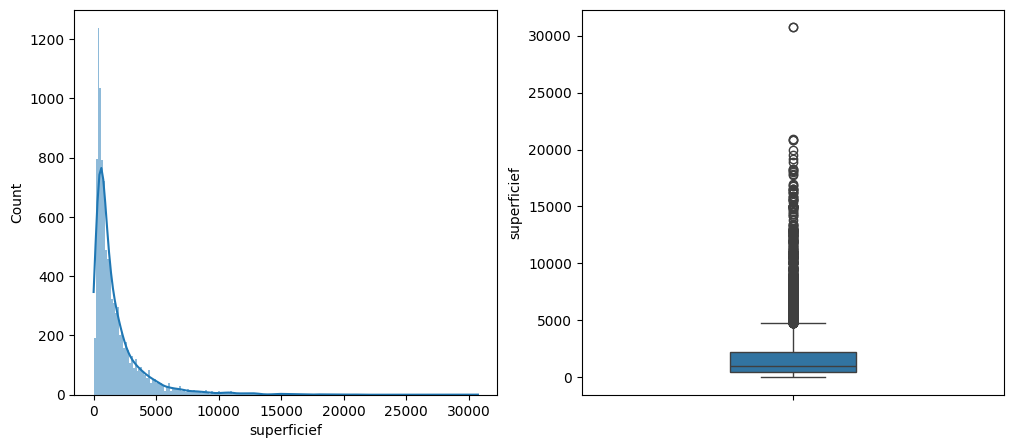

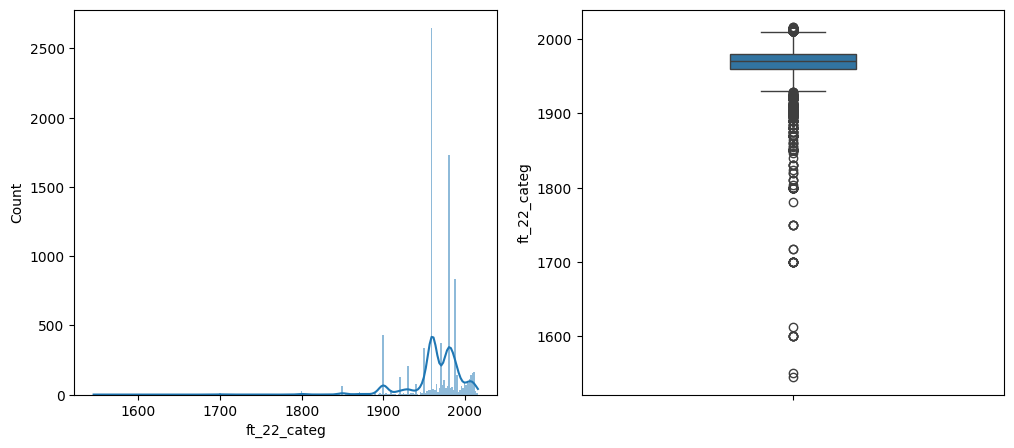

In [458]:
import seaborn as sns

for col in df.select_dtypes(['float64', 'int64']):
    plt.figure(figsize=(12,5))
    
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, edgecolor=None)

    plt.subplot(1,2,2)
    sns.boxplot(df[col], width=0.3)

## Variable EXPO

In [459]:
df['EXPO'] = df['EXPO'].str.replace(',', '.')
df['EXPO'] = df['EXPO'].astype(float)

df.head()

,Identifiant,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,target
0,18702,2014,1.000000,0,V,N,1,O,1,O,...,V,base,2,1351.0,4,2012.0,0.0,2,65440,0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,N,base,2,1972.0,2,1980.0,0.0,.,14341,1
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,N,base,2,1630.0,4,NaN,0.0,.,75109,0
3,13428,2013,0.246575,0,N,V,V,V,V,V,...,N,base,2,532.0,3,NaN,0.0,.,92004,0
4,17137,2015,1.000000,0,V,N,2,O,1,O,...,V,base,2,1050.0,2,1972.0,0.0,4,59340,0


In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10229 entries, 0 to 10228
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Identifiant  10229 non-null  int64  
 1   ft_2_categ   10229 non-null  object 
 2   EXPO         10229 non-null  float64
 3   ft_4_categ   10229 non-null  object 
 4   ft_5_categ   10229 non-null  object 
 5   ft_6_categ   10229 non-null  object 
 6   ft_7_categ   10229 non-null  object 
 7   ft_8_categ   10229 non-null  object 
 8   ft_9_categ   10229 non-null  object 
 9   ft_10_categ  10229 non-null  object 
 10  ft_11_categ  10229 non-null  object 
 11  ft_12_categ  10229 non-null  object 
 12  ft_13_categ  10229 non-null  object 
 13  ft_14_categ  10229 non-null  object 
 14  ft_15_categ  10229 non-null  object 
 15  ft_16_categ  10229 non-null  object 
 16  ft_17_categ  10229 non-null  object 
 17  ft_18_categ  10229 non-null  object 
 18  ft_19_categ  10229 non-null  object 
 19  supe

<Axes: xlabel='EXPO', ylabel='Count'>

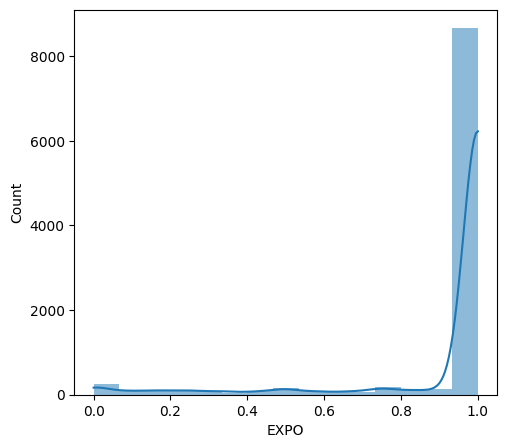

In [461]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['EXPO'], kde=True, edgecolor=None)